In [48]:
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
from rpca import RPCA

In [ ]:
# S1.mat # good patient data
# S3.mat # good patient data
# S19.mat # medium patient data
# S29.mat # bad patient data
# S31.mat # good patient data
# S32.mat # good patient data

subject = 1

eeg_data = sio.loadmat(f'S{subject}.mat')['data']

frequency_to_index = {
    8: 0, 9: 1, 10: 2, 11: 3, 12: 4, 13: 5, 14: 6, 15: 7,
    8.2: 8, 9.2: 9, 10.2: 10, 11.2: 11, 12.2: 12, 13.2: 13, 14.2: 14, 15.2: 15,
    8.4: 16, 9.4: 17, 10.4: 18, 11.4: 19, 12.4: 20, 13.4: 21, 14.4: 22, 15.4: 23,
    8.6: 24, 9.6: 25, 10.6: 26, 11.6: 27, 12.6: 28, 13.6: 29, 14.6: 30, 15.6: 31,
    8.8: 32, 9.8: 33, 10.8: 34, 11.8: 35, 12.8: 36, 13.8: 37, 14.8: 38, 15.8: 39,
}

In [ ]:
selected_channels = {
    # "Pz": 47,
    # "PO5": 53,
    # "PO3": 54,
    # "POz": 55,
    # "PO4": 56,
    # "PO6": 57,
    "O1": 60,
    "Oz": 61,
    "O2": 62,
}
trial = 4
frequency = 8
frequency_index = frequency_to_index[frequency]
electrode_data = eeg_data[:, :, frequency_index, trial - 1]  # Dados do eletrodo Oz (dimensões 1500 x 6)
start_sample = 375
end_sample = 625

X = electrode_data[list(selected_channels.values()), start_sample:end_sample]
print(X.shape)

lamb = 1 / np.sqrt(max(X.shape)) / 10
mu = lamb / 2
L, S = RPCA(X, lamb, mu, tolerance=10e-4, max_iteration=5000)

electrode_data_filtered_L = L
electrode_data_filtered_S = S

(3, 250)
[[-7.52338171e+00  2.92537236e+00  7.68217897e+00  1.03003349e+01
   2.85420251e+00  7.06952631e-01  4.59741592e+00  6.08530807e+00
   6.62960815e+00  5.96046448e+00  3.15489459e+00  6.25700533e-01
   2.05280185e+00 -1.73090708e+00  1.16392159e+00  3.33578444e+00
   5.05586767e+00  3.44980431e+00  4.22303391e+00  1.67589879e+00
   1.50064337e+00  5.24906397e+00 -3.33608091e-02  2.37706900e+00
   5.84926176e+00  5.70247459e+00  1.25236483e+01  4.78838825e+00
   5.32705402e+00  6.59595108e+00  4.65716887e+00  7.71850538e+00
   8.13455200e+00  5.52173281e+00  3.78103995e+00  4.86919546e+00
   2.29210997e+00  1.40189540e+00  2.25860095e+00 -2.92982054e+00
  -2.75812340e+00 -4.64085937e-02  5.21392393e+00 -1.16599739e+00
  -1.88303236e-02  1.07065964e+00  2.33288431e+00  1.91743112e+00
  -2.42273614e-01  5.80478096e+00  8.46089458e+00  1.37192993e+01
   1.46419849e+01  1.21308804e+01  1.06902857e+01  9.93410777e-03
  -7.51581955e+00 -1.25752459e+01 -1.42926607e+01 -9.73987389e+00
 

In [ ]:
print("Dimensão de electrode_data_filtered_L:", electrode_data_filtered_L.shape)
print("Dimensão de electrode_data_filtered_S:", electrode_data_filtered_S.shape)

(2, 3)


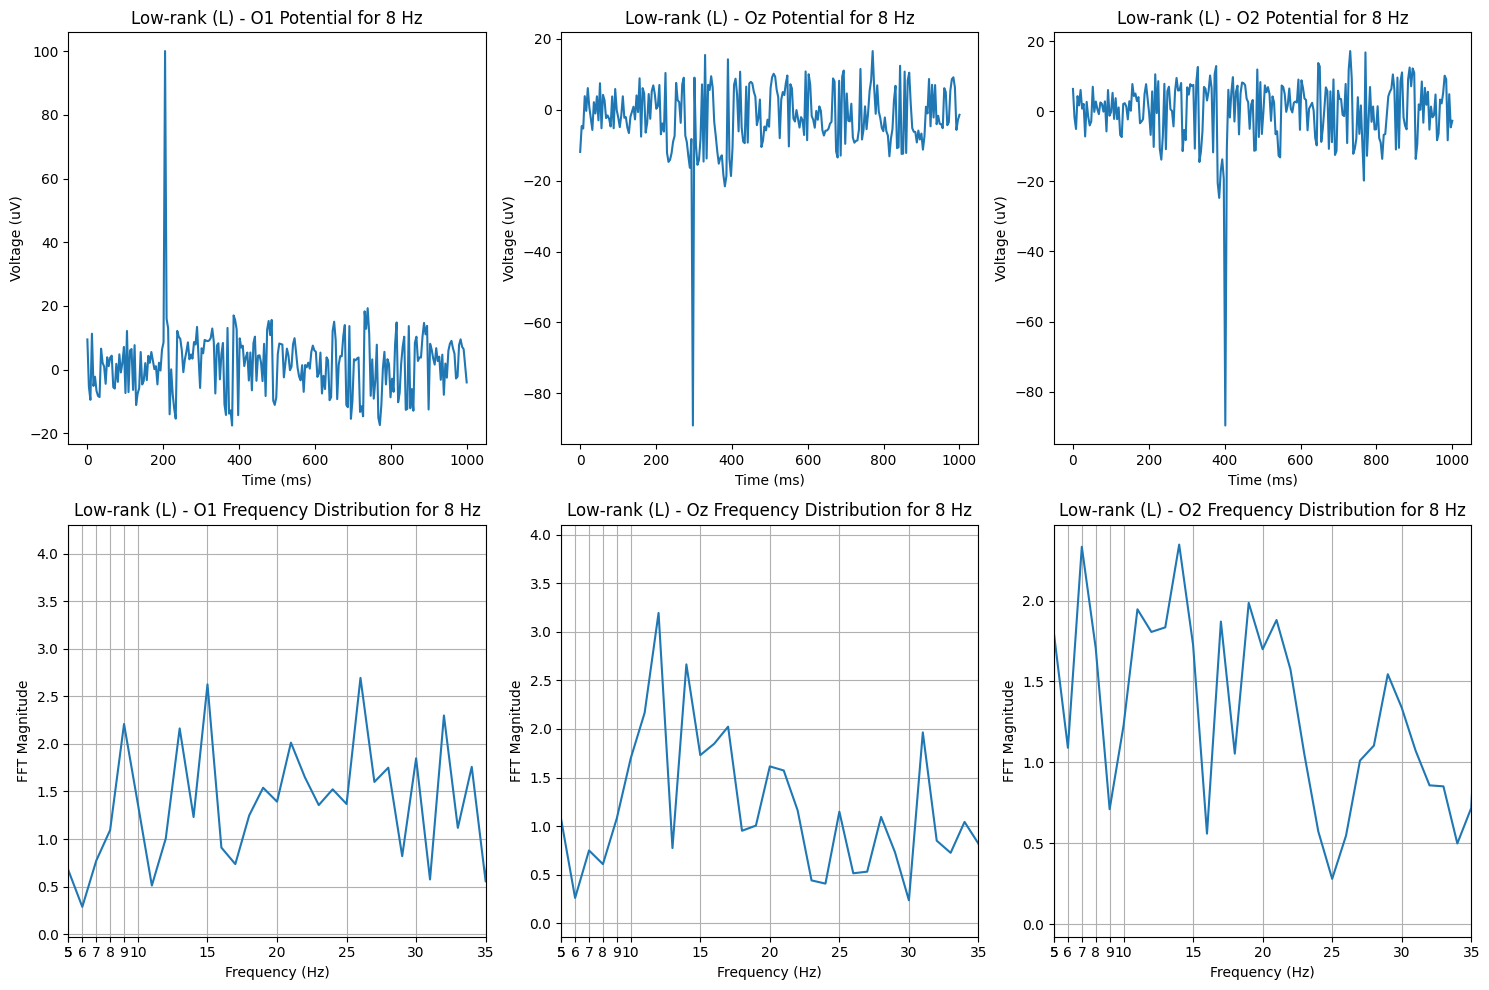

(2, 3)


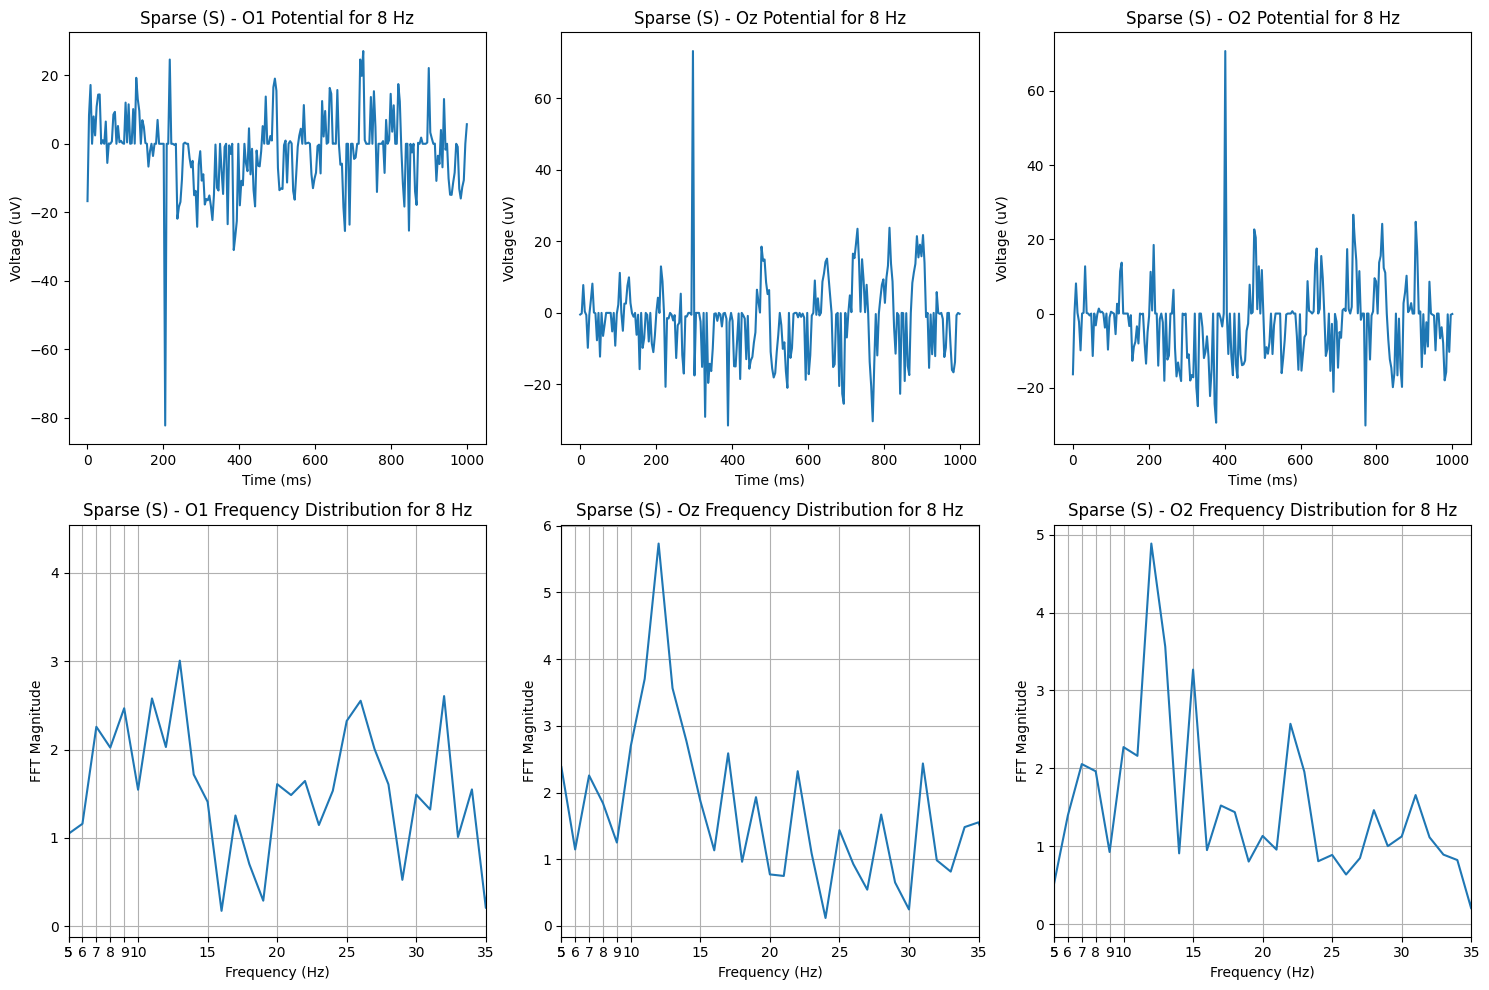

In [ ]:
samples = 250
spacing = 4  # Correspondendo a uma taxa de amostragem de 250 Hz
time_range = np.linspace(0, samples * spacing, samples)
freq_range = fftfreq(samples, spacing)[: samples // 2] * 1000


# Função para plotar no domínio do tempo e da frequência
def plot_time_frequency(data_matrix, title_prefix):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    print(axes.shape)

    for i, electrode_index in enumerate([0, 1, 2]):
        electrode_data = data_matrix[electrode_index, :]
        electrode_fft = 2 / samples * np.abs(fft(electrode_data)[0 : samples // 2])

        # Plot no domínio do tempo
        axes[0, i].set_title(
            f"{title_prefix} - {list(selected_channels.keys())[electrode_index]} Potential for 8 Hz"
        )
        axes[0, i].plot(time_range, electrode_data)
        axes[0, i].set_xlabel("Time (ms)")
        axes[0, i].set_ylabel("Voltage (uV)")

        # Plot no domínio da frequência
        axes[1, i].set_title(
            f"{title_prefix} - {list(selected_channels.keys())[electrode_index]} Frequency Distribution for {frequency} Hz"
        )
        axes[1, i].plot(freq_range, electrode_fft)
        axes[1, i].set_xticks(np.hstack((np.arange(0, 100, 5), np.arange(5, 10, 1))))
        axes[1, i].set_xlim(5, 35)
        axes[1, i].set_xlabel("Frequency (Hz)")
        axes[1, i].set_ylabel("FFT Magnitude")
        axes[1, i].grid()

    plt.tight_layout()
    plt.show()


# Plotar a matriz L (componente de baixa frequência)
plot_time_frequency(electrode_data_filtered_L, title_prefix="Low-rank (L)")

# Plotar a matriz S (componente de ruído/esparsidade)
plot_time_frequency(electrode_data_filtered_S, title_prefix="Sparse (S)")